<a href="https://colab.research.google.com/github/PEJ12/Data_Science/blob/main/W6L2_Matplotlib(2)_Seaborn_and_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PNUCSE 데이터과학입문  
## 6주차 실습자료 (2)
### 교강사: 박영진, youngjinpark@pusan.ac.kr
---

## 실습 목표

- 히스토그램과 박스 차트의 차이를 이해할 수 있다.
- Seaborn 패키지를 알고 활용할 수 있다.
- Correlation coefficient를 활용할 수 있다.

공부완료

#Stacked Bar Chart

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame()
df['Quarter'] = ['1Q','2Q','3Q','4Q'] #1분기, 2분기 ..
df['A'] = [300,100,300,250]
df['B'] = [400,200,400,100]
df['C'] = [250,500,200,300]
df['D'] = [100,200,300,400]
df.head()

,Quarter,A,B,C,D
0,1Q,300,400,250,100
1,2Q,100,200,500,200
2,3Q,300,400,200,300
3,4Q,250,100,300,400


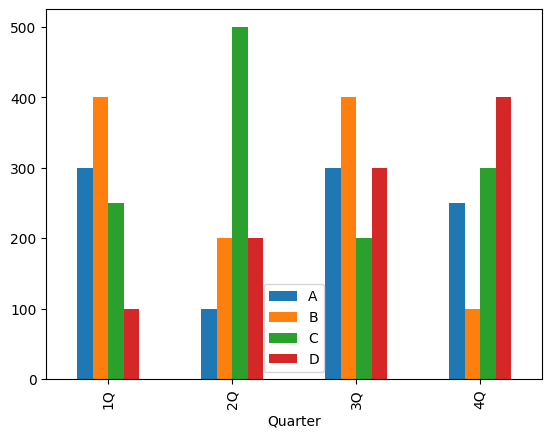

In [ ]:
ax = df.plot.bar(x = 'Quarter')

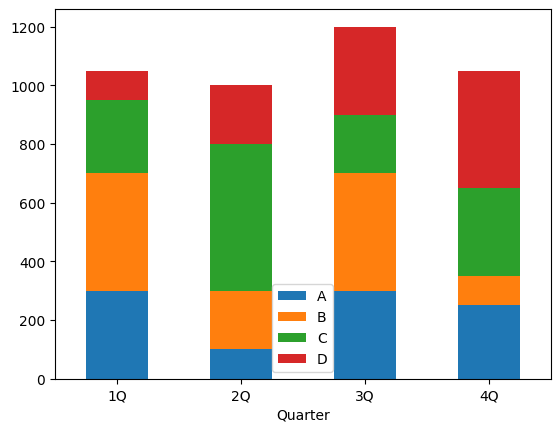

In [ ]:
ax = df.plot.bar(stacked = True, x = 'Quarter', rot=0)
#rot=0 : 1Q... 글자가 돌아감 / 총합과 비율이 중요할 때 누적막대 사용

\mu


밑의 코드 추가 공부

펭귄 종별 평균 체중 이상/이하인 개체 수

달러...달러는 LaTeX 수식으로 평균(μ)을 나타냄.

bottom = np.zeros(3) → 누적 막대그래프의 시작 높이를 지정 (처음엔 0)

width는 막대(bar)의 너비

label=boolean: 범례(legend)에서 "Below", "Above"로 구분됨

bottom += weight_count: 누적 위치 업데이트

ax.bar(...)로 각 종마다 막대(bar)를 그림

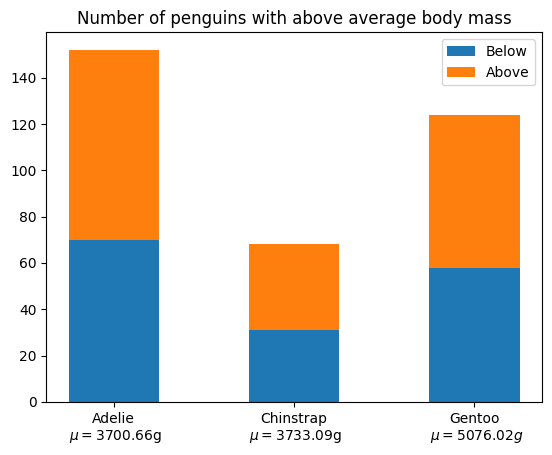

In [ ]:
species = (
  "Adelie\n $\\mu=$3700.66g",
  "Chinstrap\n $\\mu=$3733.09g",
  "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
  "Below": np.array([70, 31, 58]),
  "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
  p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
  bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

#Histogram: Matplotlib

[10.  7.  2.  1.  1.] [  4.   23.2  42.4  61.6  80.8 100. ]


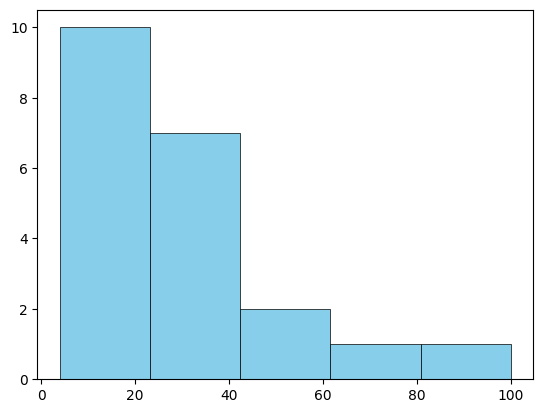

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5

n, bins, patches = plt.hist(x, num_bins, color='skyblue', alpha=1.0)
print(n, bins)
#num_bins : 칸의 개수 , alpha 는 투명도와 관련 / 1.0 은 불투명, 0.1은 투명 / 반투명하게 하면 다른 데이터와 동시에 시각화 가능
# patches : 사각형 여러개 (array 처럼 저장)
for patch in patches: # 각 네모 설정, 이거 안하면 네모사이 구분선 없어짐
    patch.set_edgecolor('black') #skyblue랑 같은걸로 하면 안보임
    patch.set_linewidth(0.5)
#박스 시작이 0이 아닌 4
plt.show()

In [ ]:
np.random.seed(19680801)

mu_x = 200
sigma_x = 25
x = np.random.normal(mu_x, sigma_x, size=100)

mu_w = 200
sigma_w = 10
w = np.random.normal(mu_w, sigma_w, size=100)

"density=True 의미"

y축은 빈도수가 아니라, 구간 너비까지 고려한 확률 밀도를 나타냄.

이 상태에서 히스토그램 전체 면적(즉, 막대들의 넓이 합)이 1이 되도록 정규화돼.

즉, 이 히스토그램은 확률 분포의 근사 형태가 되는 거야.

"fig.tight_layout() 의미"

 플롯 안에 있는 요소들(제목, 라벨, 축 등)이 서로 겹치지 않도록 자동으로 레이아웃을 조정해주는 함수

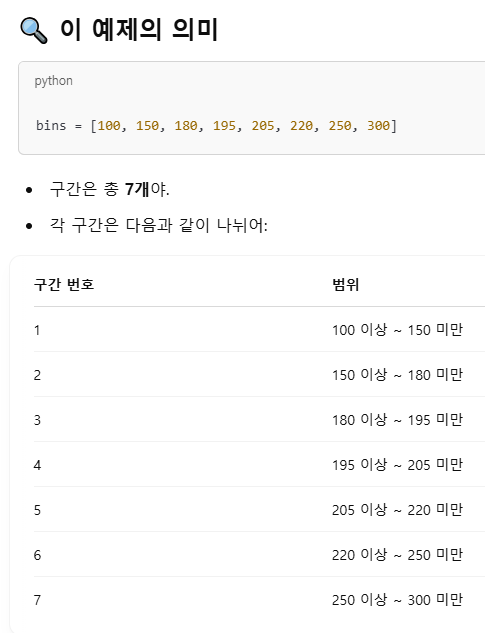

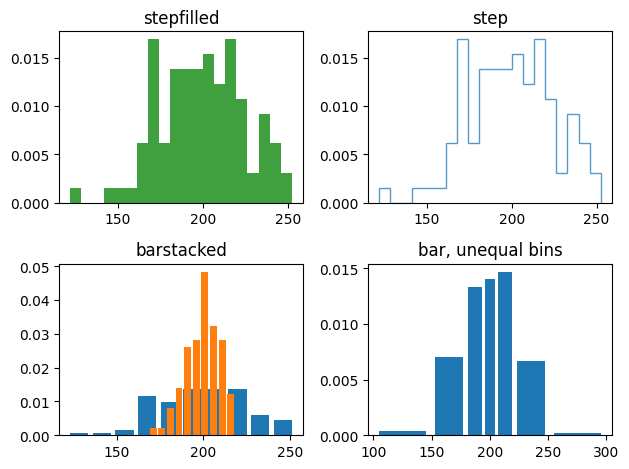

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2) #4개 차트

axs[0, 0].hist(x, 20, density=True, histtype='stepfilled', facecolor='g', alpha=0.75)
#20의 의미 : 막대를 20개로 나눈다는 뜻 (20개의 구간으로 데이터를 분할), bin 개수
axs[0, 0].set_title('stepfilled')

axs[0, 1].hist(x, 20, density=True, histtype='step', alpha=0.75)
axs[0, 1].set_title('step')

axs[1, 0].hist(x, density=True, histtype='barstacked', rwidth=0.8) #rwidth : 기본값인 1.0 은 히스토그램사이 간격 없애려고 할때 / 양옆으로 비율로 간격 띄워라
axs[1, 0].hist(w, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].set_title('barstacked')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300] #100, 150 : 100이상 150 미만
axs[1, 1].hist(x, bins, density=True, histtype='bar', rwidth=0.8)
axs[1, 1].set_title('bar, unequal bins')

fig.tight_layout()
plt.show()

#Histogram: Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
sns.get_dataset_names() # Seaborn's dataset

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

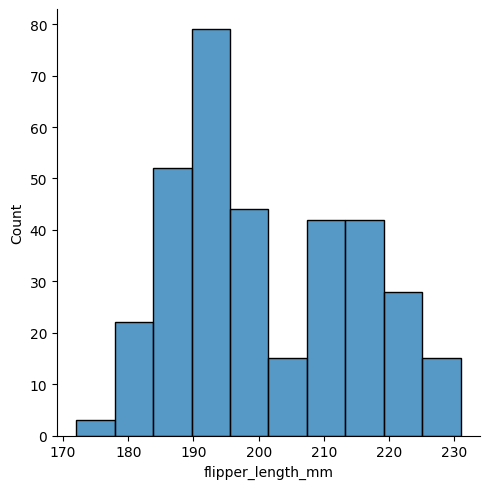

In [ ]:
sns.displot(penguins, x="flipper_length_mm")
# "distribution plot", 즉 데이터의 분포를 시각화하는 함수

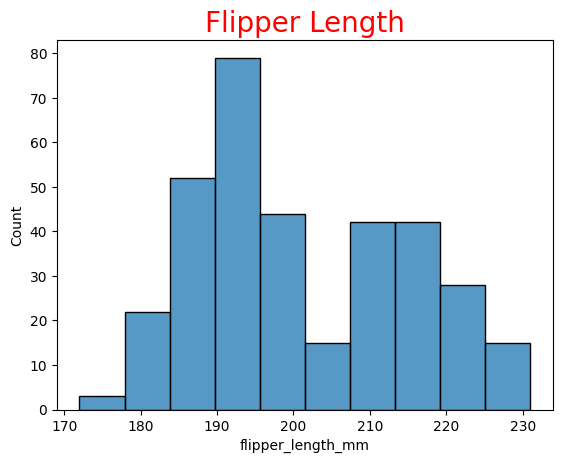

In [ ]:
# sns.displot(penguins, x="flipper_length_mm")
fig, ax = plt.subplots()
ax=sns.histplot(x = "flipper_length_mm", data = penguins) #열의 이름, 데이터프레임
plt.title("Flipper Length", size=20, color="red")
plt.show()

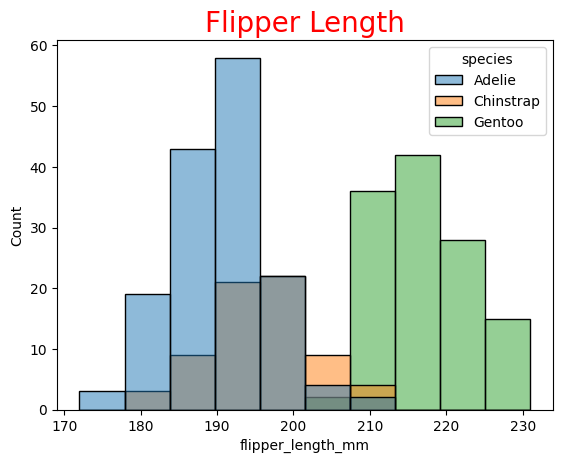

In [ ]:
fig, ax = plt.subplots()
ax=sns.histplot(x = "flipper_length_mm", data = penguins, hue = "species") #y가 최대 60으로 바뀜
# hue는 카테고리별로 데이터를 색깔로 구분해서 시각화
#y축은 빈도 , 다른 차원추가하려면 색깔추가 , hue에 분류하고자하는 새로운 열의 이름 -> 색깔 부여됨
plt.title("Flipper Length", size=20, color="red")
plt.show()

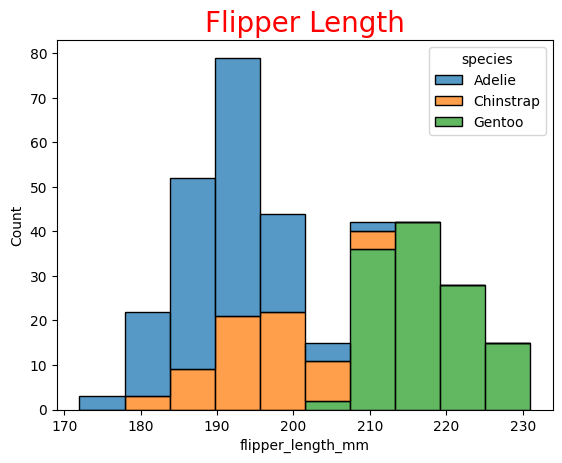

In [ ]:
fig, ax = plt.subplots()
ax=sns.histplot(x = "flipper_length_mm", data = penguins, hue = "species", multiple='stack')
plt.title("Flipper Length", size=20, color="red")
plt.show()

#Box Plot: Matplotlib
#제일 중요

> 인용구 추가



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# loading dataset
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.groupby('species').count() #speacies가 같으면 묶어서 표현

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [ ]:
c1 = iris[iris['species'] == 'setosa']
c2 = iris[iris['species'] == 'versicolor']
c3 = iris[iris['species'] == 'virginica']

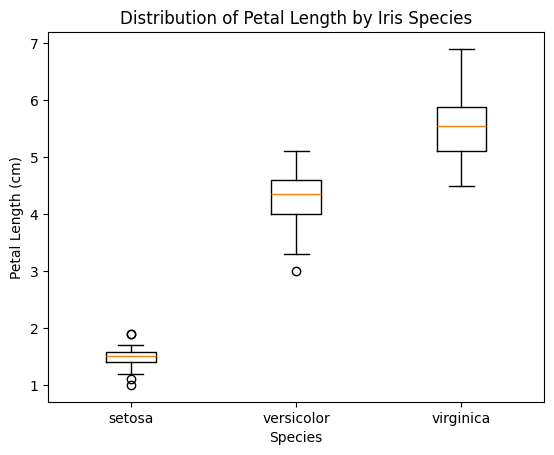

In [ ]:
plt.boxplot((c1.petal_length, c2['petal_length'], c3['petal_length']))
plt.xticks([1,2,3],['setosa','versicolor','virginica'])
#X축 눈금을 1, 2, 3으로 놓고 그에 대응하는 레이블을 각각 'setosa', 'versicolor', 'virginica'로 설정.
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Distribution of Petal Length by Iris Species')
#plt.grid()
plt.show()

#Box Plot: Seaborn

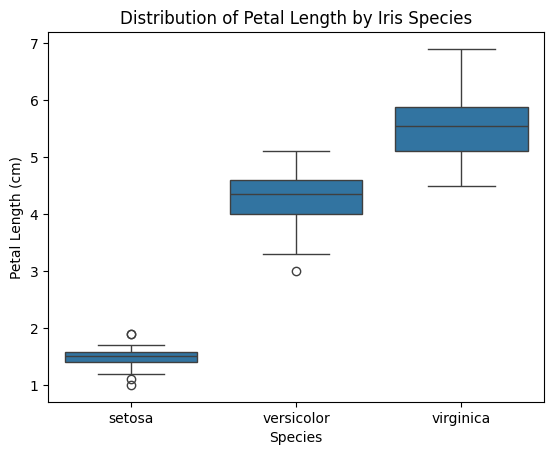

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(data=iris, x='species', y='petal_length')

ax.set_xlabel('Species')
ax.set_ylabel('Petal Length (cm)')
ax.set_title('Distribution of Petal Length by Iris Species')

plt.show()

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


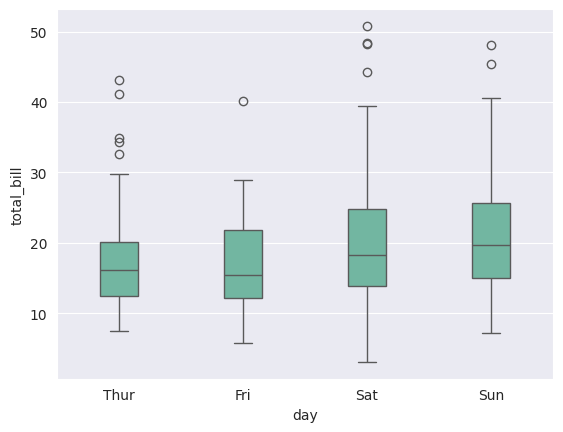

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2') #이 두줄은 색상관련 코드, 나중에 더 설명

fig, ax = plt.subplots()
ax=sns.boxplot(data=df, x='day', y='total_bill', width=0.3)
ax.set_title('Tips by Day') #팁 아니라 식사금액에 대한것
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Bill Amount ($)')
plt.show()

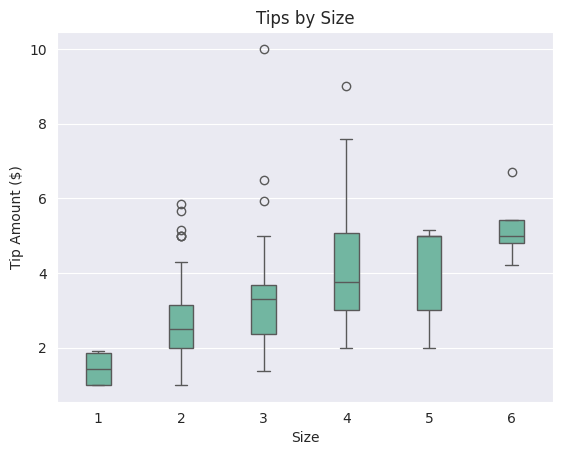

In [ ]:
# Q. 식사인원 수가 많을수록 팁을 많이 줄까?
fig, ax = plt.subplots()
ax=sns.boxplot(data=df, x='size', y='tip', width=0.3)
ax.set_title('Tips by Size')
ax.set_xlabel('Size')
ax.set_ylabel('Tip Amount ($)')
plt.show()

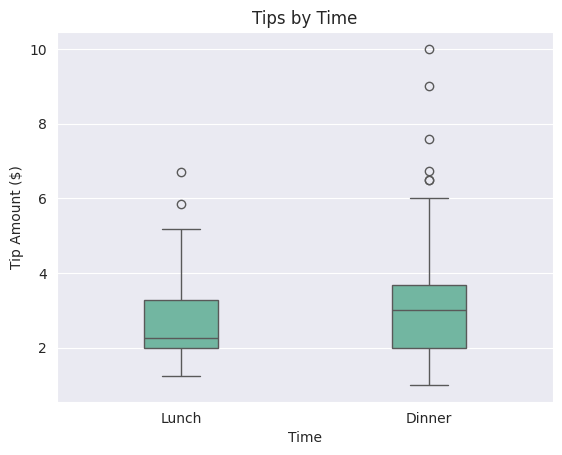

In [ ]:
# Q. 점심/저녁 중 팁을 더 많이 받는 때는?
fig, ax = plt.subplots()
ax=sns.boxplot(data=df, x='time', y='tip', width=0.3)
ax.set_title('Tips by Time')
ax.set_xlabel('Time')
ax.set_ylabel('Tip Amount ($)')
plt.show()
#Q2 보면 디너가 더 많이 받는거 알수있다

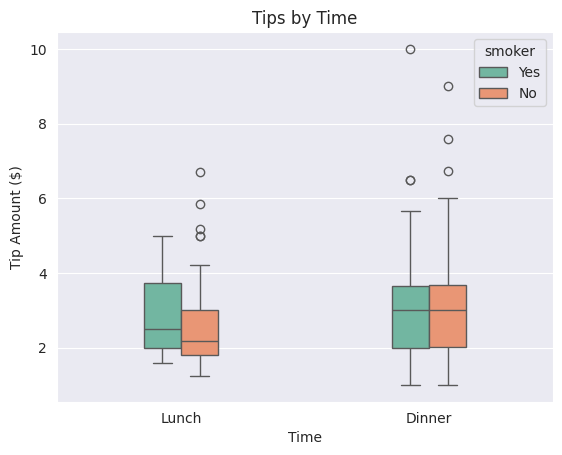

In [ ]:
# Q. 점심/저녁 중 흡연자/비흡연자에 따라 팁이 차이가 날까?
fig, ax = plt.subplots()
ax=sns.boxplot(data=df, x='time', y='tip', hue='smoker', width=0.3)
ax.set_title('Tips by Time')
ax.set_xlabel('Time')
ax.set_ylabel('Tip Amount ($)')
plt.show()

#Seaborn: More graphs

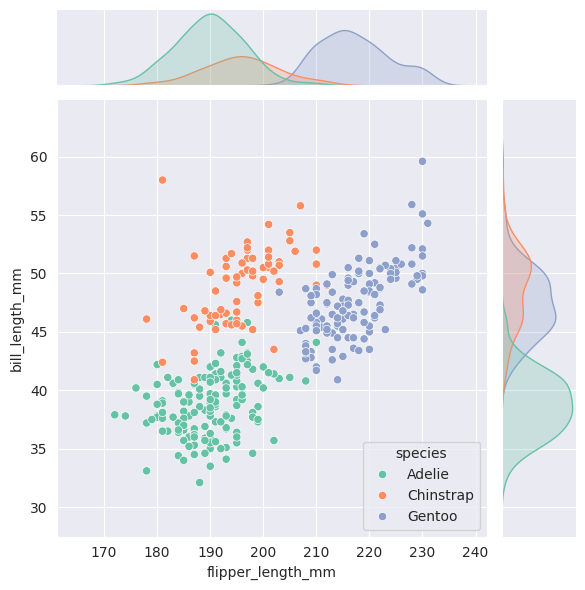

In [ ]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins,
	x="flipper_length_mm",
  y="bill_length_mm", hue="species")
plt.show()

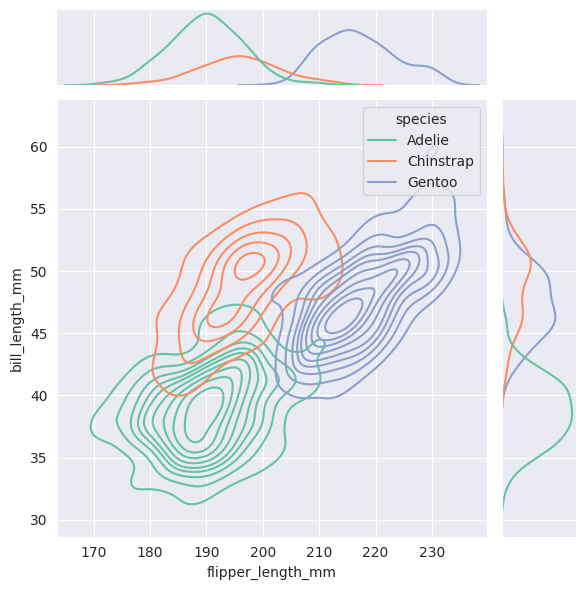

In [ ]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins,
	x="flipper_length_mm",
  y="bill_length_mm", hue="species", kind="kde")
#kde는 **Kernel Density Estimation (커널 밀도 추정)**의 줄임말
#간단히 말해서, 데이터의 분포를 부드러운 곡선으로 추정해주는 기법
plt.show()

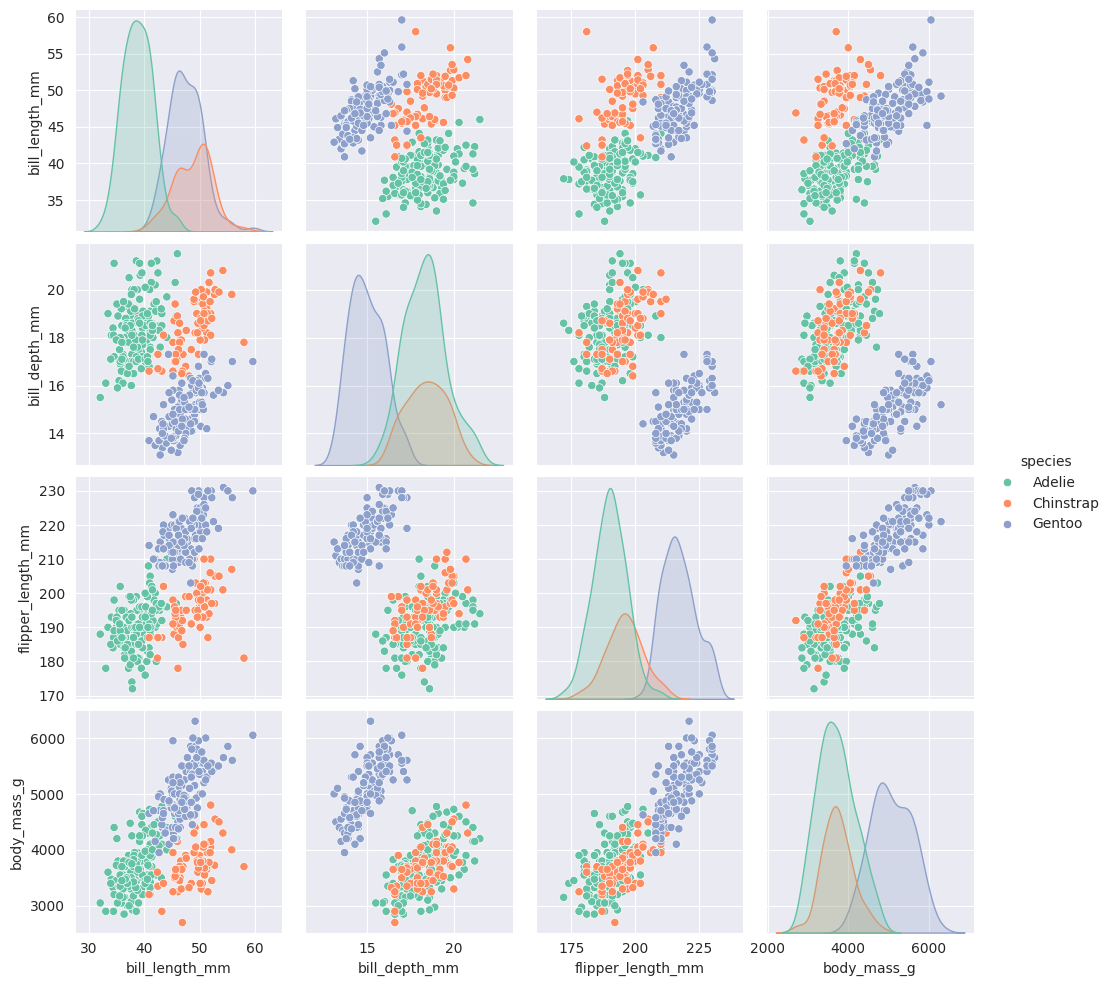

In [ ]:
sns.pairplot(data=penguins, hue="species") #hue="species" 이거 없을때도 해보기 , 있을 때는 종별로 특징
plt.show()

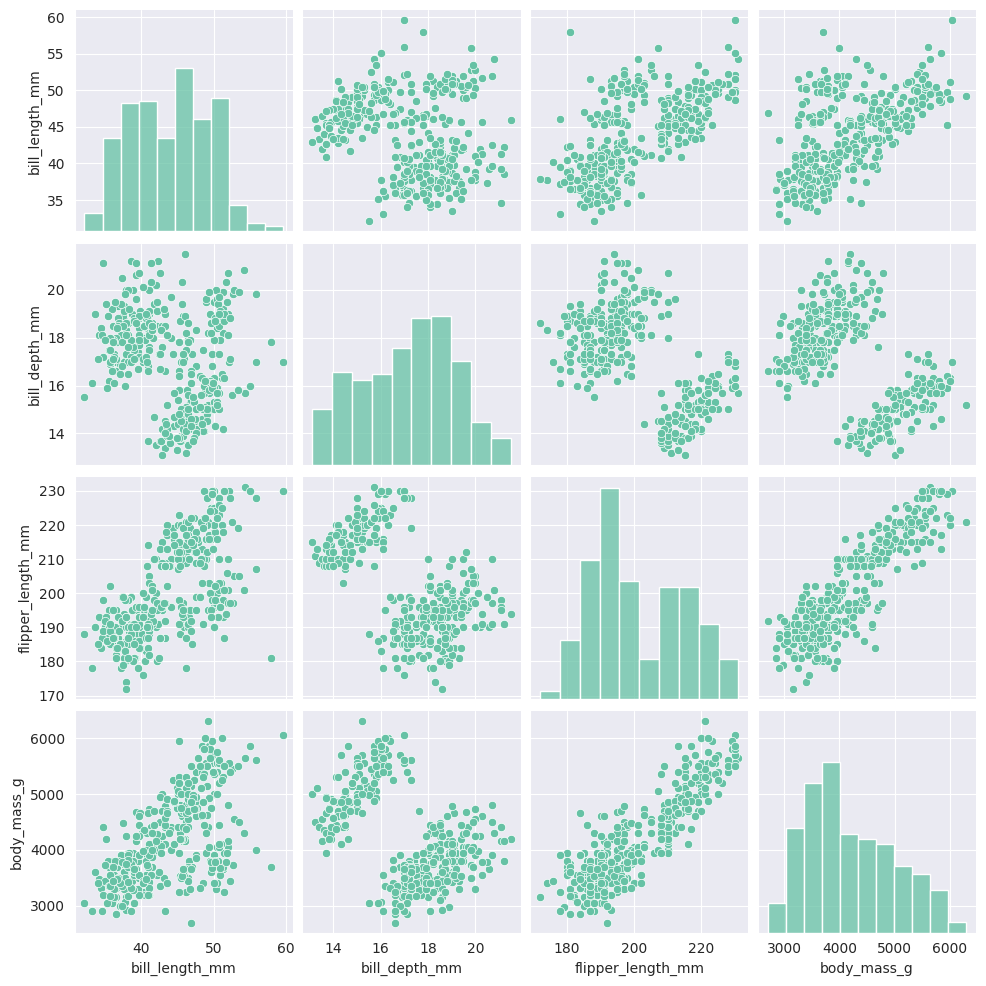

In [ ]:
sns.pairplot(data = penguins)
plt.show()

# Correlation Coefficient


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
#print(penguins)
numeric_cols = penguins.select_dtypes(include='number')
#penguins 데이터프레임에서 숫자형 열만 선택
corr_matrix = numeric_cols.corr()
#숫자형 열들 사이의 피어슨 상관계수(Pearson correlation coefficient) 를 계산
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


밑의 속성 추가 공부

**annot=True**

각 셀 안에 실제 상관계수 숫자(소수점) 를 표시

**cmap="coolwarm"**

색상 팔레트를 지정

파란색 계열 (cool): 음의 상관관계 (예: -1)

하얀색: 거의 0 (상관관계 없음)

빨간색 계열 (warm): 양의 상관관계 (예: +1)

**vmin=-1, vmax=1**

색상 스케일의 범위를 -1에서 1로 고정합니다.

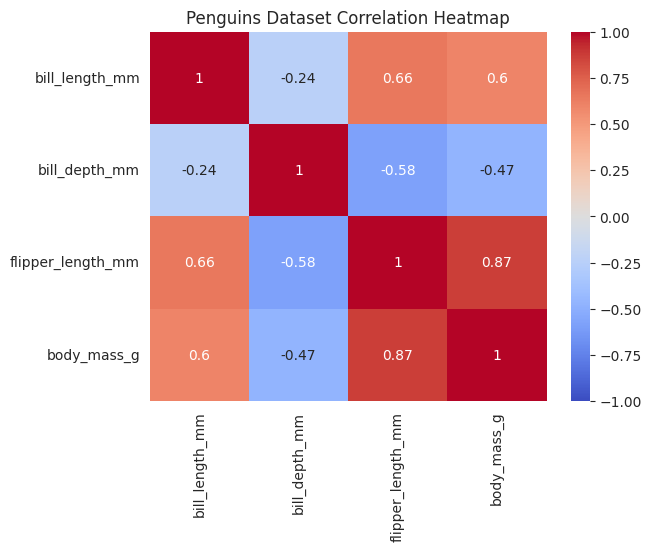

In [ ]:
# 상관계수 히트맵 시각화
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Penguins Dataset Correlation Heatmap")
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

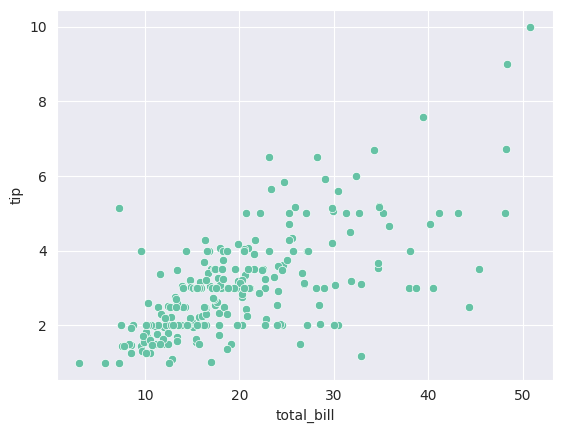

In [ ]:
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip")
#이건 밑에서 확인해보면 0.68의 상관계수 가짐

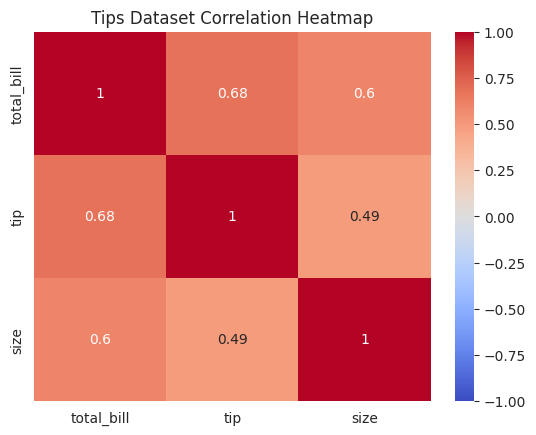

In [ ]:
tips = sns.load_dataset("tips")
tips_numeric = tips.select_dtypes(include='number')
tips_corr = tips_numeric.corr()

sns.heatmap(tips_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
#sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Tips Dataset Correlation Heatmap")
plt.show()

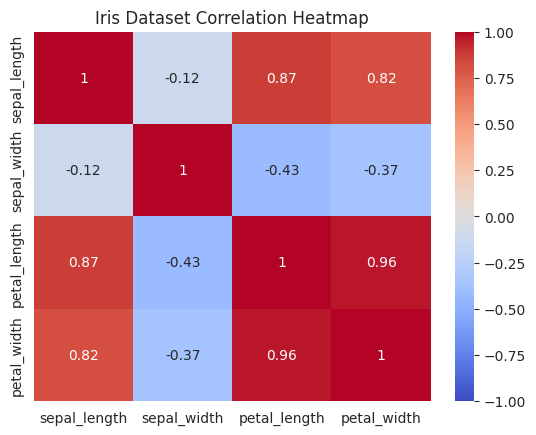

In [ ]:
iris = sns.load_dataset("iris")
iris_numeric = iris.select_dtypes(include='number')
iris_corr = iris_numeric.corr()

sns.heatmap(iris_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Iris Dataset Correlation Heatmap")
plt.show()

<h2>Various Coefficients</h2>

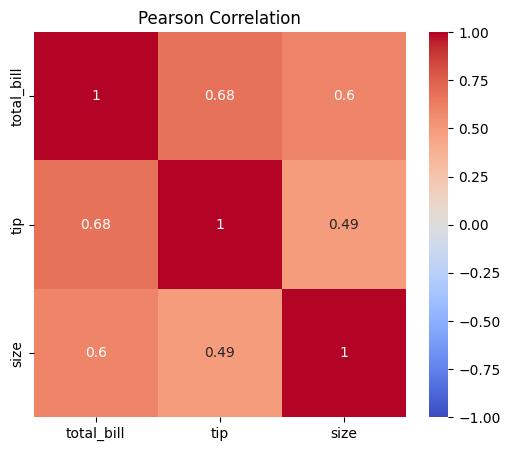

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
num_cols = tips.select_dtypes(include='number')

pearson_corr = num_cols.corr(method='pearson')
spearman_corr = num_cols.corr(method='spearman')

# 시각화: Pearson
plt.figure(figsize=(6, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation")
plt.show() #대각선은 같은 1

In [ ]:
tips_outlier = tips.select_dtypes(include='number').copy()
tips_outlier

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [ ]:
print(tips_outlier.loc[0]) #행과 열을
tips_outlier.loc[0,'total_bill']

total_bill    16.99
tip            1.01
size           2.00
Name: 0, dtype: float64


np.float64(16.99)

In [ ]:
print(tips_outlier.iloc[0])
print(tips_outlier.iloc[0,1])
print(tips_outlier.iloc[:5,1:])

total_bill    16.99
tip            1.01
size           2.00
Name: 0, dtype: float64
1.01
    tip  size
0  1.01     2
1  1.66     3
2  3.50     3
3  3.31     2
4  3.61     4


 **plt.subplot(1, 2, 1)**

 Matplotlib에서 여러 그래프(서브플롯)를 한 창에 그릴 때

**plt.subplot(nrows, ncols, index)**

nrows: 전체 subplot의 행(row) 수

ncols: 전체 subplot의 열(column) 수

index: 현재 그릴 subplot의 순서 (왼쪽 위부터 1번)

Text(0.5, 1.0, 'With Outlier: total_bill vs tip')

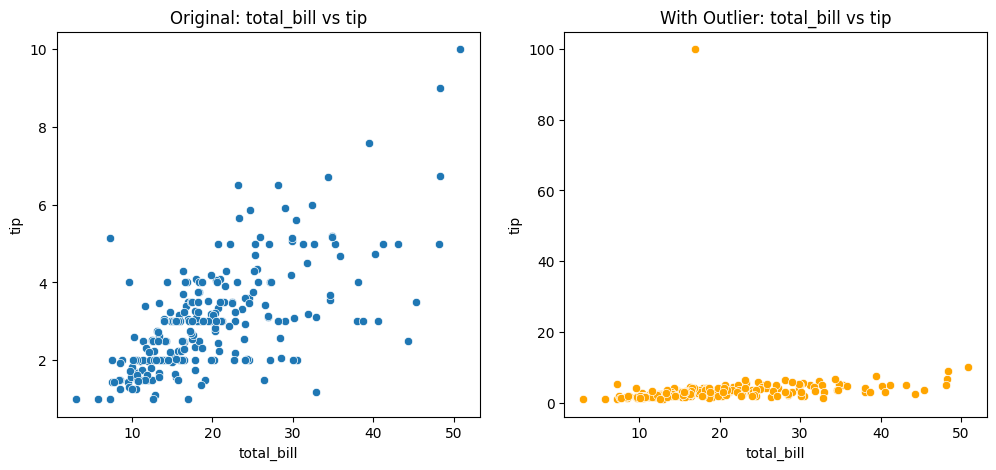

In [ ]:
# Add outliers
tips_outlier = tips.select_dtypes(include='number').copy()
tips_outlier.loc[0, 'tip'] = 100

plt.figure(figsize=(12, 5))

# 1. Original
plt.subplot(1, 2, 1)
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title("Original: total_bill vs tip")

# 2. With outlier
plt.subplot(1, 2, 2)
sns.scatterplot(data=tips_outlier, x='total_bill', y='tip', color='orange')
plt.title("With Outlier: total_bill vs tip")

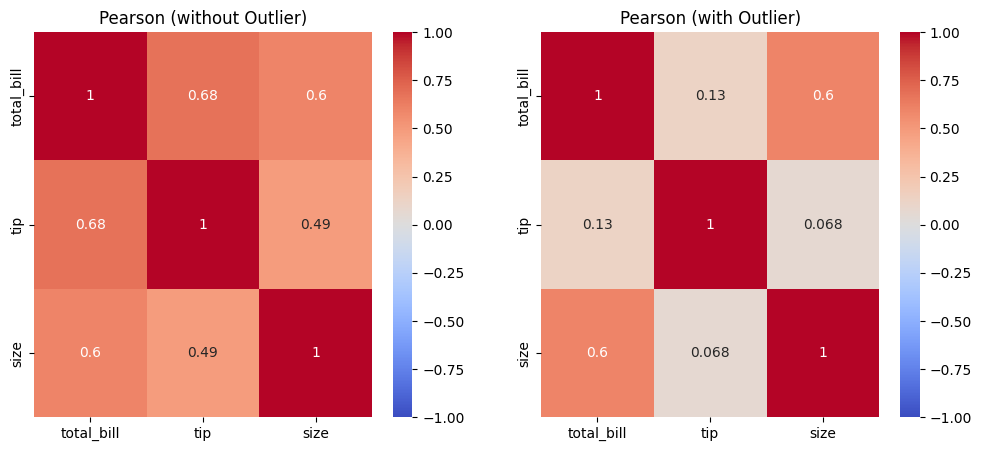

In [ ]:
pearson_corr_out = tips.select_dtypes(include='number').corr(method='pearson')
pearson_corr_outlier_out = tips_outlier.corr(method='pearson')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_out, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson (without Outlier)")

plt.subplot(1, 2, 2)
sns.heatmap(pearson_corr_outlier_out, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson (with Outlier)")

plt.show()

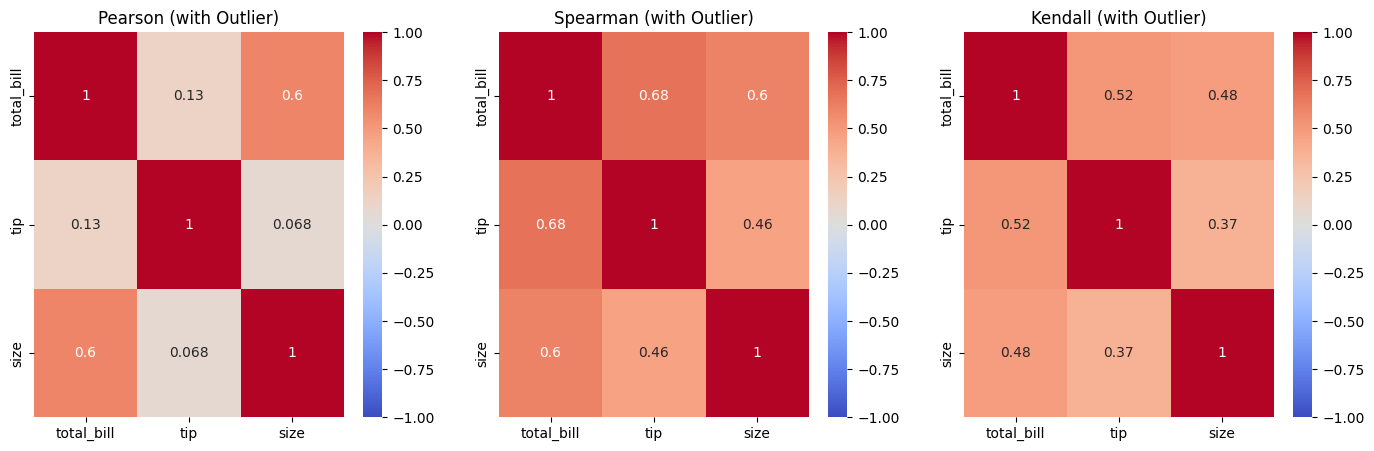

In [ ]:
pearson_corr_out = tips_outlier.corr(method='pearson')
spearman_corr_out = tips_outlier.corr(method='spearman')
kendall_corr_out = tips_outlier.corr(method='kendall')

plt.figure(figsize=(17, 5))

plt.subplot(1, 3, 1)
sns.heatmap(pearson_corr_out, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson (with Outlier)")

plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr_out, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman (with Outlier)")

plt.subplot(1, 3, 3)
sns.heatmap(kendall_corr_out, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall (with Outlier)")

plt.show()